In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sc
import seaborn as sns

# Methode Dichotomie

In [2]:
def calcul_dichotomie(a,b,funct,p):
    a,b=min(a,b),max(a,b)
    x,y=a,b
    i=0
    while np.abs(a-b)>p :
        i=i+1
        m=(a+b)/2
        (a,b)=(a,m) if funct(a)*funct(m)<0 else (b,m)
    return [x,y],m,i

In [3]:
calcul_dichotomie(0,1,lambda x:np.exp(-x/10)-x,10**-3)

([0, 1], 0.9130859375, 10)

In [4]:
calcul_dichotomie(0,1,lambda x:np.exp(-x/10)-x,10**-6)

([0, 1], 0.9127645492553711, 20)

# Pour la dichotomie plus la precision est grande plus le nombre d'iteration est grande

In [48]:
calcul_dichotomie(0,1,lambda x:np.exp(-x/10)-x,10**-3)

([0, 1], 0.9130859375, 10)

In [6]:
calcul_dichotomie(0,10,lambda x:np.exp(-x/10)-x,10**-3)

([0, 10], 0.9124755859375, 14)

# Pour la dichotomie plus la taille de l'intervalle est grande plus le nombre d'iteration est grande

# Methode Fausse position

In [7]:
def calcul_lagrange(a,b,funct,p):
    inter=[a,b]
    i=0
    while np.abs(a-b)>p :
        i=i+1
        x=a-(a-b)/(funct(a)-funct(b))*funct(a)
        (a,b)=(a,x) if funct(a)*funct(x)<0 else (b,x)
    return inter,x,i

In [47]:
calcul_lagrange(0,1,lambda x:np.exp(-x/10)-x,1e-3)

([0, 1], 0.9127652716086226, 7)

In [10]:
calcul_lagrange(0,0.5,lambda x:np.exp(-x/10)-x,1e-6)

([0, 0.5], 0.9127652716086226, 4)

# Pour lagrange quand je dimunie l'intervalle le nombre d'iteration dimunie 

# Methode de la secante

In [27]:
def method_secante(a,b,funct,p): 
    a,b = min(a, b), max(a,b)
    i=1
    while np.abs(a-b)>p:
        xo=b
        b=b-(b-a)/(funct(b)-funct(a))*funct(b)
        a=xo
        i=i+1
    return b,i

In [46]:
method_secante(0,1,lambda x:np.exp(-x/10)-x,1e-3)

(0.9127651474614689, 3)

# Methode de Newtone

In [30]:
def methode_newtone(a,b,funct,p,derive=None):
    x=(a+b)/2
    i=1
    if derive==None:
        derive=lambda s:(funct(s+10**-3)-funct(s-10**-3))/(2*1e-3)
    while np.abs(x-b)>p:
        b=x
        x=x-funct(x)/derive(x)
        i=i+1
    return x,i

In [45]:
methode_newtone(0,1,lambda x:np.exp(-x/10)-x,10**-3)

(0.9127652716086226, 4)

In [76]:
dic=calcul_dichotomie(0,1,lambda x:np.exp(-x/10)-x,10**-3)[2]
lang=calcul_lagrange(0,1,lambda x:np.exp(-x/10)-x,10**-3)[2]
secant=method_secante(0,1,lambda x:np.exp(-x/10)-x,10**-3)[1]
newton=methode_newtone(0,1,lambda x:np.exp(-x/10)-x,10**-3)[1]
donne=np.array([[dic,lang,secant,newton]])
df=pd.DataFrame(data=donne,columns=['dichtomie','lagrange','secante','newton'])

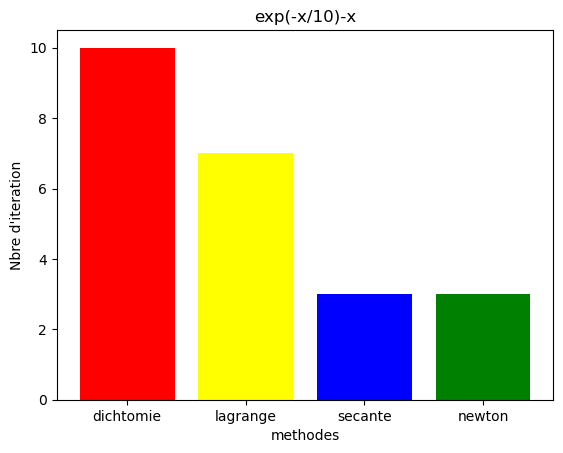

In [77]:
plt.bar(df.columns,df.loc[0],color=['red','yellow','blue','green'])
plt.title('exp(-x/10)-x')
plt.xlabel('methodes')
plt.ylabel("Nbre d'iteration")
plt.show()

# Newtone et secante sont plus rapide pour cette methode

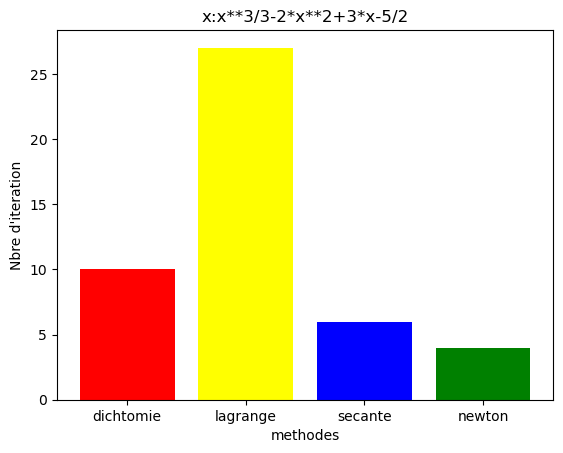

In [92]:
dic=calcul_dichotomie(4,5,lambda x:x**3/3-2*x**2+3*x-5/2,1e-3)[2]
lang=calcul_lagrange(4,5,lambda x:x**3/3-2*x**2+3*x-5/2,1e-3)[2]
secant=method_secante(4,5,lambda x:x**3/3-2*x**2+3*x-5/2,1e-3)[1]
newton=methode_newtone(4,5,lambda x:x**3/3-2*x**2+3*x-5/2,1e-3)[1]
donne=np.array([[dic,lang,secant,newton]])
df=pd.DataFrame(data=donne,columns=['dichtomie','lagrange','secante','newton'])
plt.bar(df.columns,df.loc[0],color=['red','yellow','blue','green'])
plt.title('x:x**3/3-2*x**2+3*x-5/2')
plt.xlabel('methodes')
plt.ylabel("Nbre d'iteration")
plt.show()

In [106]:
def fonct(x):
    return x**3/3-2*x**2+3*x-5/2

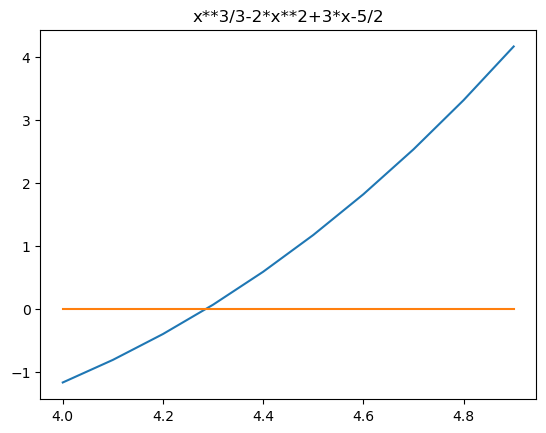

In [119]:
x=np.array(np.arange(4,5,0.1))
zer=[0 for i in x]
y=[fonct(x) for x in inter]
plt.title('x**3/3-2*x**2+3*x-5/2')
plt.plot(x,y)
plt.plot(x,zer)

In [82]:
calcul_dichotomie(0,1,lambda x:np.exp(-x/10)-x,1e-3)[1]

0.9130859375

In [ ]:
sc.bisect(lambda x:np.exp(-x/10)-x,0,1,xtol=10**-3)

# Ma methode de dichotomie et celle du module scipy.optimize ont le meme resultat

In [84]:
sc.bisect(lambda x:x**3/3-2*x**2+3*x-5/2,4,5,xtol=10**-3)

4.3173828125

In [87]:
calcul_dichotomie(4,5,lambda x:x**3/3-2*x**2+3*x-5/2,10**-5)

([4, 5], 4.3173828125, 10)

In [88]:
calcul_lagrange(0,1,lambda x:x**3/3-2*x**2+3*x-5/2,10**-5)

([0, 1], 4.317931287501235, 28)

In [90]:
methode_newtone(0,1,lambda x:x**3/3-2*x**2+3*x-5/2,10**-5)

(4.317931287501372, 11)

In [91]:
sc.newton(lambda x:x**3/3-2*x**2+3*x-5/2,4)

4.317931287501235

# Meme resultat avec newton